In [1]:
# Bibliothèques importantes pour l'analyse des séries temporelles
import numpy as np                   # Pour les calculs numériques et la génération de données
import pandas as pd                  # Pour manipuler les données sous forme de tableaux (DataFrame)
import matplotlib.pyplot as plt      # Pour tracer des graphiques et visualiser les séries temporelles
from statsmodels.tsa.seasonal import seasonal_decompose  # Pour décomposer automatiquement la série en tendance, saisonnalité et bruit


In [6]:
df = pd.read_csv("2_1_daily-minimum-temperatures.csv", sep=";")

In [7]:
df.head()

,Date,Daily minimum temperatures
0,01/01/1981,"20,7"
1,02/01/1981,"17,9"
2,03/01/1981,"18,8"
3,04/01/1981,"14,6"
4,05/01/1981,"15,8"


In [9]:
df.describe()

,Date,Daily minimum temperatures
count,3650,3650
unique,3650,230
top,01/01/1981,10
freq,1,51


In [10]:
df.isnull().sum()

Date                          0
Daily minimum temperatures    0
dtype: int64

décomposition de la serie en tendance et saison


In [12]:
# Ensure numeric values: replace comma decimals and coerce to float
df['Daily minimum temperatures'] = df['Daily minimum temperatures'].astype(str).str.replace(',','.', regex=False)
df['Daily minimum temperatures'] = pd.to_numeric(df['Daily minimum temperatures'], errors='coerce')
n_missing = df['Daily minimum temperatures'].isna().sum()
if n_missing > 0:
    print(f"{n_missing} non-numeric values converted to NaN and will be dropped")
    df = df.dropna(subset=['Daily minimum temperatures']).reset_index(drop=True)
# Décomposition automatique
decomposition = seasonal_decompose(df['Daily minimum temperatures'], model='additive', period=52)
df['Tendance'] = decomposition.trend
df['Saisonnalité'] = decomposition.seasonal
df['Bruit'] = decomposition.resid

3 non-numeric values converted to NaN and will be dropped


graphique de la serie

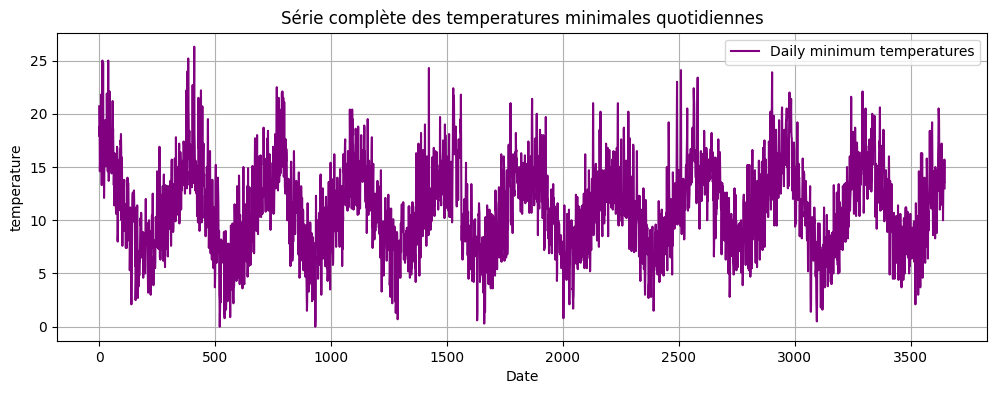

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df['Daily minimum temperatures'], color='purple', label='Daily minimum temperatures')
plt.title("Série complète des temperatures minimales quotidiennes")
plt.xlabel("Date")
plt.ylabel("temperature")
plt.grid(True)
plt.legend()
plt.show()

tendances

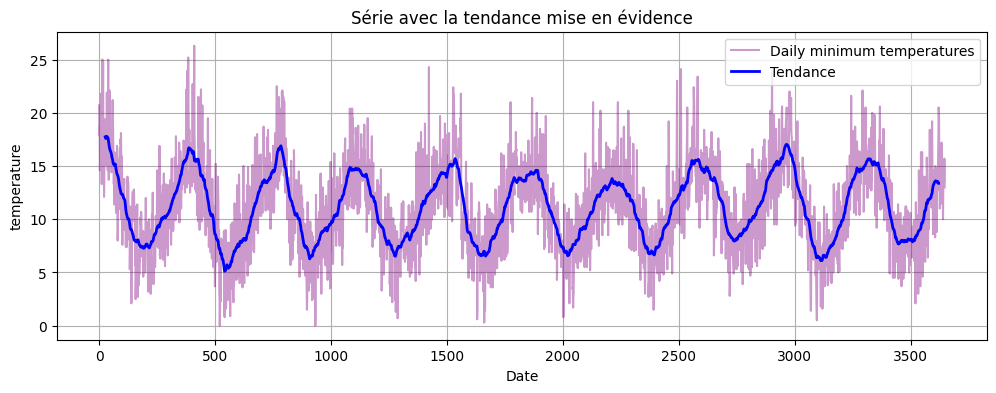

In [14]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df['Daily minimum temperatures'], color='purple', alpha=0.4, label='Daily minimum temperatures')
plt.plot(df.index, df['Tendance'], color='blue', linewidth=2, label='Tendance')
plt.title("Série avec la tendance mise en évidence")
plt.xlabel("Date")
plt.ylabel("temperature")
plt.grid(True)
plt.legend()
plt.show()

Observation les tendances, variations saisonnières et fluctuations

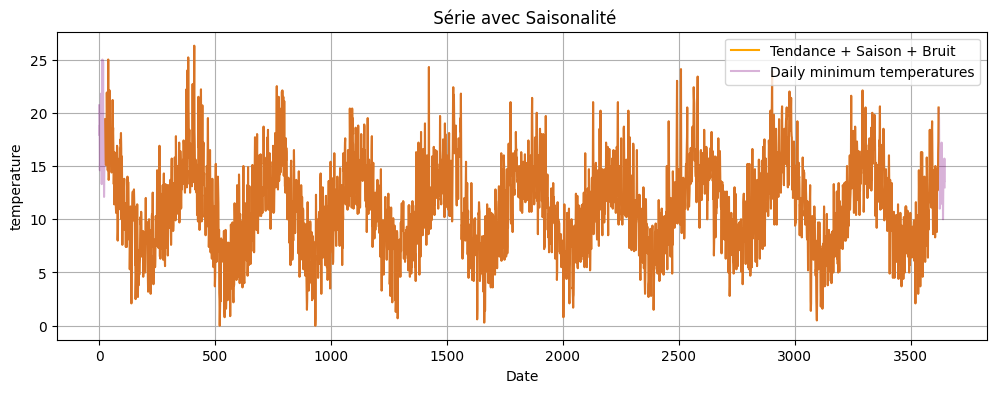

In [15]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df['Tendance'] + df['Saisonnalité'] + df['Bruit'], color='orange', label='Tendance + Saison + Bruit')
plt.plot(df.index, df['Daily minimum temperatures'], color='purple', alpha=0.3, label='Daily minimum temperatures')
plt.title(" Série avec Saisonalité")
plt.xlabel("Date")
plt.ylabel("temperature")
plt.grid(True)
plt.legend()
plt.show()

grouper les comptages par jour

In [21]:
import datetime as dt

df_journalier = df.groupby('Date')['Daily minimum temperatures'].sum().reset_index()
#df_journalier = df_journalier[df_journalier["Date"] >= dt.date(2025, 1, 7)]

df_journalier.head()




,Date,Daily minimum temperatures
0,01/01/1981,20.7
1,01/01/1982,17.0
2,01/01/1983,18.4
3,01/01/1984,19.5
4,01/01/1985,13.3


Decomposition de la serie

In [23]:
df_journalier.set_index('Date', inplace=True)

In [26]:
from statsmodels.tsa.seasonal import STL
stl = STL(df_journalier['Daily minimum temperatures'], period=365)
result = stl.fit()

In [27]:
trend = result.trend        # Tendance
seasonal = result.seasonal  # Saisonnalité
residual = result.resid      # Résidus


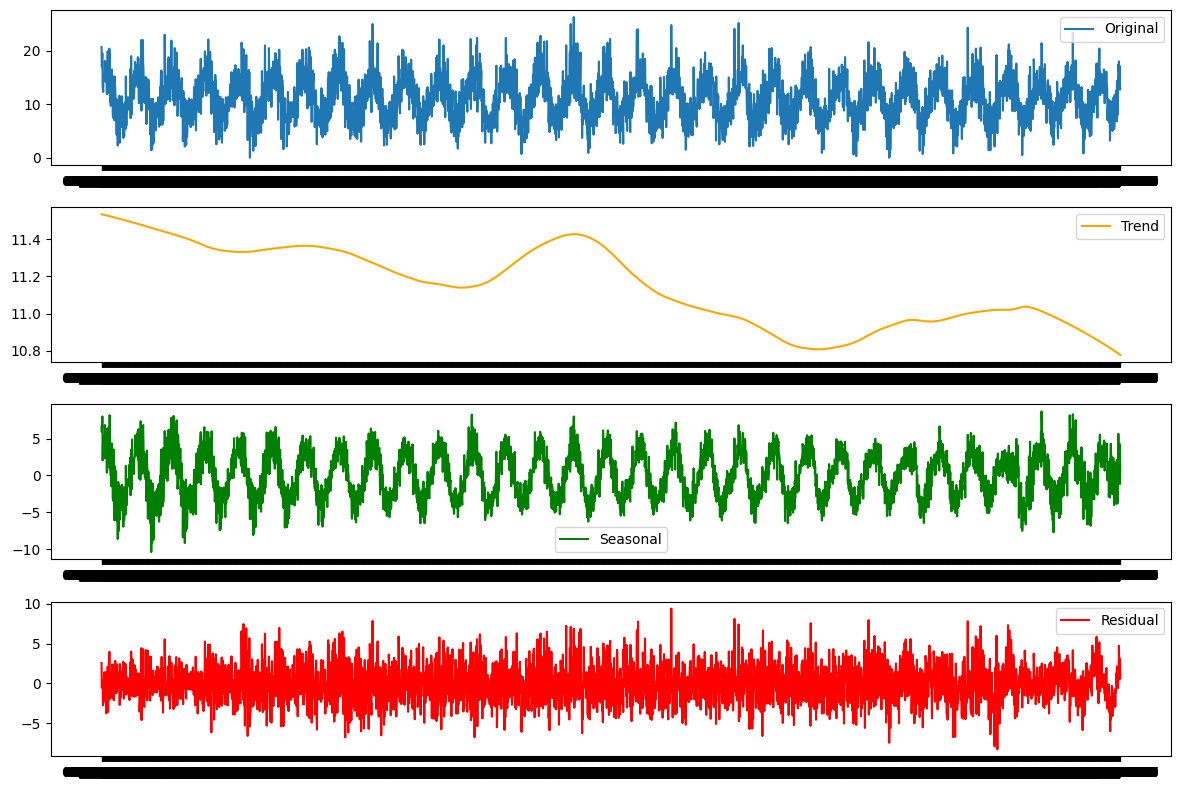

In [28]:

plt.figure(figsize=(12,8))
plt.subplot(4,1,1)
plt.plot(df_journalier['Daily minimum temperatures'], label='Original')
plt.legend()

plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='orange')
plt.legend()

plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonal', color='green')
plt.legend()

plt.subplot(4,1,4)
plt.plot(residual, label='Residual', color='red')
plt.legend()

plt.tight_layout()
plt.show()
